In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
def convert_marks(datafrm,cl):
    mks=list(datafrm[cl])
    finmks=[]
    for m in mks:
        if m in list(range(0,10)):
            finmks.append(0)
        if m in list(range(10,21)):
            finmks.append(1)
        #if m in list(range(15,21)):
            #finmks.append(2)
    return finmks
def encode(dfr):
    dcols=list(dfr.columns)
    for col in dcols[1:]:
        if dfr[col].dtype=='object':
            dfr[col]=dfr[col].astype('category')
            dfr[col]=dfr[col].cat.codes
    return dfr
def predict_accuracy(datfr,cl):
    all_cols=list(datfr.columns)
    feature_cols=[]
    for i in all_cols:
        if i==cl:
            break
        feature_cols.append(i)
    feature_data=datfr[feature_cols]
    label_data=datfr[cl]
    X_train,X_test,y_train,y_test=train_test_split(feature_data,label_data,test_size=0.33,random_state=42)
    #neigh=KNeighborsClassifier(n_neighbors=7)
    #neigh=DecisionTreeClassifier()
    neigh=SVC(gamma='auto')
    neigh.fit(X_train,y_train)
    pred_labels=neigh.predict(X_test)
    acc_scores=accuracy_score(y_test,pred_labels)
    #eature_data[lab]=list(label_data)
    return acc_scores


            

In [5]:
import pandas as pd
small=pd.read_csv('D:\\student\\merged.csv')
big=pd.read_csv('D:\\student\\final_combined_dataset.csv')
small_cols=list(small.columns)
big_cols=list(big.columns)
sm=small_cols[1:]
small_cat=encode(small)
acc_score={}
labels=['G1.x','G2.x','G3.x']
orig_acc=[]
exp_acc=[]
for lab in labels:
    small_cat[lab]=convert_marks(small_cat,lab)
    big[lab]=convert_marks(big,lab)
for lab in labels:
    s=predict_accuracy(small_cat,lab)
    b=predict_accuracy(big,lab)
    orig_acc.append(s)
    exp_acc.append(b)
    print('original dataset accuracy for %r is %r  ' % (lab,predict_accuracy(small_cat,lab)))
    print('bigger dataset accuracy for %r is %r ' % (lab,predict_accuracy(big,lab)))
    

original dataset accuracy for 'G1.x' is 0.6456692913385826  
bigger dataset accuracy for 'G1.x' is 0.8116438356164384 
original dataset accuracy for 'G2.x' is 0.6062992125984252  
bigger dataset accuracy for 'G2.x' is 0.8561643835616438 
original dataset accuracy for 'G3.x' is 0.6771653543307087  
bigger dataset accuracy for 'G3.x' is 0.8732876712328768 


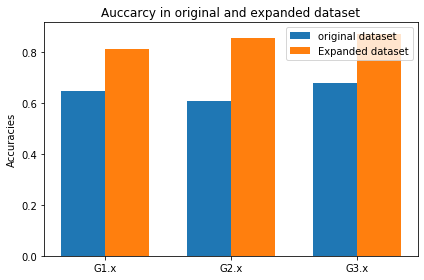

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1.x', 'G2.x', 'G3.x']
#men_means = [20, 34, 30, 35, 27]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, orig_acc, width, label='original dataset')
rects2 = ax.bar(x + width/2, exp_acc, width, label='Expanded dataset')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracies')
ax.set_title('Auccarcy in original and expanded dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.savefig('comparison.png')
plt.show()